In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, lognorm
from scipy.special import factorial
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def bs(S, K, v, t, r, q, cp = "c"):
    cp_flag = 1 + -2*(cp == "p")
    d_1 = (np.log(S / K) + t*(0.5*v**2 + r - q)) / (v*t**0.5)
    d_2 = d_1 - v*t**0.5
    return(cp_flag * (S*norm.cdf(d_1 * cp_flag)*np.exp(-q*t) - K*norm.cdf(d_2 * cp_flag)*np.exp(-r*t)))

def bs(S, K, v, t, r, q, cp = "c"):
    d_1 = (np.log(S / K) + t*(0.5*v**2 + r - q)) / (v*t**0.5)
    d_2 = d_1 - v*t**0.5
    if cp == "c":
        return(S*norm.cdf(d_1)*np.exp(-q*t) - K*norm.cdf(d_2)*np.exp(-r*t))
    else:
        return(K*norm.cdf(-d_2)*np.exp(-r*t) - S*norm.cdf(-d_1)*np.exp(-q*t))

bs(S = 100, K = 95, v = 0.2, t = 120/365, r = 0.05, q = 0, cp = "c")

8.445718356844722

In [3]:
bs(S = 100, K = 95, v = 0.2, t = 120/365, r = 0.05, q = 0, cp = "p")

1.8968399069818815

In [102]:
def binomial_euro(S, K, v, t, r, q, n = 1000, cp = "c"):
    delt_t = (t / n)
    u = np.exp(v * delt_t**0.5)
    d = 1 / u
    p = (np.exp((r - q) * delt_t) - d) / (u - d)
    stock_1 =  [(u**k * d**(n - k) * S) for k in range(0, n + 1)]
    if cp == "c":
        option_1 = [max(0, (u**k * d**(n - k) * S) - K) for k in range(0, n + 1)]
        for i in range(n, 0, -1):
            stock_2 = []
            option_2 = []
            for j in range(0, i):
                stock_2.append(stock_1[j] / d)
                option_2.append((option_1[j]*(1-p) + option_1[j+1]*(p)) * np.exp(-r * delt_t))
            stock_1 = stock_2
            option_1 = option_2
        return(option_2[0])
    else:
        option_1 = [max(0, K - (u**k * d**(n - k) * S)) for k in range(0, n + 1)]
        for i in range(n, 0, -1):
            stock_2 = []
            option_2 = []
            for j in range(0, i):
                stock_2.append(stock_1[j] / d)
                option_2.append((option_1[j]*(1-p) + option_1[j+1]*(p)) * np.exp(-r * delt_t))
            stock_1 = stock_2
            option_1 = option_2
        return(option_2[0])

binomial_euro(S = 100, K = 95, v = 0.2, t = 120/365, r = 0.05, n = 50, q = 0, cp = "p")    

1.9139234791625896

In [101]:
def binomial_amer(S, K, v, t, r, q, n = 1000, cp = "c"):
    delt_t = (t / n)
    u = np.exp(v * delt_t**0.5)
    d = 1 / u
    p = (np.exp((r - q) * delt_t) - d) / (u - d)
    stock_1 =  [(u**k * d**(n - k) * S) for k in range(0, n + 1)]
    if cp == "c":
        option_1 = [max(0, (u**k * d**(n - k) * S) - K) for k in range(0, n + 1)]
        for i in range(n, 0, -1):
            stock_2 = []
            option_2 = []
            for j in range(0, i):
                stock_2.append(stock_1[j] / d)
                option_2.append(max(stock_2[j] - K, (option_1[j]*(1-p) + option_1[j+1]*(p)) * np.exp(-r * delt_t)))
            stock_1 = stock_2
            option_1 = option_2
        return(option_2[0])
    else:
        option_1 = [max(0, K - (u**k * d**(n - k) * S)) for k in range(0, n + 1)]
        for i in range(n, 0, -1):
            stock_2 = []
            option_2 = []
            for j in range(0, i):
                stock_2.append(stock_1[j] / d)
                option_2.append(max(K - stock_2[j], (option_1[j]*(1-p) + option_1[j+1]*(p)) * np.exp(-r * delt_t)))
            stock_1 = stock_2
            option_1 = option_2
        return(option_2[0])

binomial_amer(S = 100, K = 95, v = 0.2, t = 120/365, r = 0.05, n = 50, q = 0, cp = "p")    

1.9740096032786751

In [6]:
def binomial_digi(S, K, v, t, r, q, n = 100, cp = "c"):
    delt_t = (t / n)
    u = np.exp(v * delt_t**0.5)
    d = 1 / u
    p = (np.exp((r - q) * delt_t) - d) / (u - d)
    stock_1 =  [(u**k * d**(n - k) * S) for k in range(0, n + 1)]
    if cp == "c":
        option_1 = [1 if (u**k * d**(n - k) * S) > K else 0 for k in range(0, n + 1)]
        for i in range(n, 0, -1):
            stock_2 = []
            option_2 = []
            for j in range(0, i):
                stock_2.append(stock_1[j] / d)
                option_2.append((option_1[j]*(1-p) + option_1[j+1]*(p)) * np.exp(-r * delt_t))
            stock_1 = stock_2
            option_1 = option_2
        return(option_2[0])
    else:
        option_1 = [1 if K > (u**k * d**(n - k) * S) else 0 for k in range(0, n + 1)]
        for i in range(n, 0, -1):
            stock_2 = []
            option_2 = []
            for j in range(0, i):
                stock_2.append(stock_1[j] / d)
                option_2.append((option_1[j]*(1-p) + option_1[j+1]*(p)) * np.exp(-r * delt_t))
            stock_1 = stock_2
            option_1 = option_2
        return(option_2[0])

binomial_digi(S = 100, K = 95, v = 0.2, t = 120/365, r = 0.05, n = 1000, q = 0, cp = "c") 

0.7007615058849564

In [138]:
def bs_digi(S, K, v, t, r, q, x = 1, cp = "c"):
    d = (np.log(S / K) + t*(-0.5*v**2 + r - q)) / (v*t**0.5)
    return(x * norm.cdf(d * (1 + -2*(cp == "p"))) * np.exp((q - r) * t))

bs_digi(S = 100, K = 95, v = 0.2, t = 120/365, r = 0.05, q = 0, cp = "c")

0.6916220311939049

In [78]:
def binomial_ki_euro(S, K, B, v, t, r, q, n = 100, cp = "c"):
    delt_t = (t / n)
    u = np.exp(v * delt_t**0.5)
    d = 1 / u
    p = (np.exp((r - q) * delt_t) - d) / (u - d)
    stock_1 =  [(u**k * d**(n - k) * S) for k in range(0, n + 1)]
    if cp == "c":
        option_1 = [max(0, (u**k * d**(n - k) * S) - K) if ((u**k * d**(n - k) * S) > B) else 0 for k in range(0, n + 1)]
        for i in range(n, 0, -1):
            stock_2 = []
            option_2 = []
            for j in range(0, i):
                stock_2.append(stock_1[j] / d)
                expected_price = (option_1[j]*(1-p) + option_1[j+1]*(p)) * np.exp(-r * delt_t)
                option_2.append(expected_price) 
            stock_1 = stock_2
            option_1 = option_2
        return(option_2[0])
    else:
        option_1 = [max(0, K - (u**k * d**(n - k) * S)) if (u**k * d**(n - k) * S) < B else 0 for k in range(0, n + 1)]
        for i in range(n, 0, -1):
            stock_2 = []
            option_2 = []
            for j in range(0, i):
                stock_2.append(stock_1[j] / d)
                expected_price = (option_1[j]*(1-p) + option_1[j+1]*(p)) * np.exp(-r * delt_t)
                option_2.append(expected_price)
            stock_1 = stock_2
            option_1 = option_2
        return(option_2[0])
    
def binomial_ko_euro(S, K, B, v, t, r, q, n = 100, cp = "c"):
    delt_t = (t / n)
    u = np.exp(v * delt_t**0.5)
    d = 1 / u
    p = (np.exp((r - q) * delt_t) - d) / (u - d)
    stock_1 =  [(u**k * d**(n - k) * S) for k in range(0, n + 1)]
    if cp == "c":
        option_1 = [max(0, (u**k * d**(n - k) * S) - K) if ((u**k * d**(n - k) * S) < B) else 0 for k in range(0, n + 1)]
        for i in range(n, 0, -1):
            stock_2 = []
            option_2 = []
            for j in range(0, i):
                stock_2.append(stock_1[j] / d)
                option_2.append((option_1[j]*(1-p) + option_1[j+1]*(p)) * np.exp(-r * delt_t))
            stock_1 = stock_2
            option_1 = option_2
        return(option_2[0])
    else:
        option_1 = [max(0, K - (u**k * d**(n - k) * S)) if (u**k * d**(n - k) * S) > B else 0 for k in range(0, n + 1)]
        for i in range(n, 0, -1):
            stock_2 = []
            option_2 = []
            for j in range(0, i):
                stock_2.append(stock_1[j] / d)
                option_2.append((option_1[j]*(1-p) + option_1[j+1]*(p)) * np.exp(-r * delt_t))
            stock_1 = stock_2
            option_1 = option_2
        return(option_2[0])

In [126]:
binomial_ko_euro(S = 100, K = 95, B = 1000, v = 0.2, t = 120/365, r = 0.05, q = 0, cp = "c")

8.449142951319109

In [122]:
mc_knockout(S = 100, K = 95, B = 110, v = 0.2, t = 120/365, r = 0.05, q = 0, cp = "c")

1.7971869973608219

In [124]:
binomial_euro(S = 100, K = 95, v = 0.2, t = 120/365, r = 0.05, q = 0, cp = "c")

8.445240743370409

In [103]:
def binomial_ki_euro(S, K, B, v, t, r, q, n = 100, cp = "c"):
    delt_t = (t / n)
    u = np.exp(v * delt_t**0.5)
    d = 1 / u
    p = (np.exp((r - q) * delt_t) - d) / (u - d)
    stock_1 =  [(u**k * d**(n - k) * S) for k in range(0, n + 1)]
    if cp == "c":
        option_1 = [max(0, (u**k * d**(n - k) * S) - K) if ((u**k * d**(n - k) * S) > B) else 0 for k in range(0, n + 1)]
        for i in range(n, 0, -1):
            stock_2 = []
            option_2 = []
            for j in range(0, i):
                stock_2.append(stock_1[j] / d)
                expected_price = ((option_1[j]*(1-p) + option_1[j+1]*(p)) * np.exp(-r * delt_t)) if (stock_1[j] / d) > B else 0
                option_2.append(expected_price) 
            stock_1 = stock_2
            option_1 = option_2
        return(option_2[0])
    else:
        option_1 = [max(0, K - (u**k * d**(n - k) * S)) if (u**k * d**(n - k) * S) < B else 0 for k in range(0, n + 1)]
        for i in range(n, 0, -1):
            stock_2 = []
            option_2 = []
            for j in range(0, i):
                stock_2.append(stock_1[j] / d)
                expected_price = (option_1[j]*(1-p) + option_1[j+1]*(p)) * np.exp(-r * delt_t) if (stock_1[j] / d) < B else 0
                option_2.append(expected_price)
            stock_1 = stock_2
            option_1 = option_2
        return(option_2[0])
    
def binomial_ko_euro(S, K, B, v, t, r, q, n = 100, cp = "c"):
    delt_t = (t / n)
    u = np.exp(v * delt_t**0.5)
    d = 1 / u
    p = (np.exp((r - q) * delt_t) - d) / (u - d)
    stock_1 =  [(u**k * d**(n - k) * S) for k in range(0, n + 1)]
    if cp == "c":
        option_1 = [max(0, (u**k * d**(n - k) * S) - K) if ((u**k * d**(n - k) * S) < B) else 0 for k in range(0, n + 1)]
        for i in range(n, 0, -1):
            stock_2 = []
            option_2 = []
            for j in range(0, i):
                stock_2.append(stock_1[j] / d)
                expected_price = ((option_1[j]*(1-p) + option_1[j+1]*(p)) * np.exp(-r * delt_t)) if (stock_1[j] / d) < B else 0
                option_2.append(expected_price)
            stock_1 = stock_2
            option_1 = option_2
        return(option_2[0])
    else:
        option_1 = [max(0, K - (u**k * d**(n - k) * S)) if (u**k * d**(n - k) * S) > B else 0 for k in range(0, n + 1)]
        for i in range(n, 0, -1):
            stock_2 = []
            option_2 = []
            for j in range(0, i):
                stock_2.append(stock_1[j] / d)
                expected_price = ((option_1[j]*(1-p) + option_1[j+1]*(p)) * np.exp(-r * delt_t)) if (stock_1[j] / d) > B else 0
                option_2.append(expected_price)
            stock_1 = stock_2
            option_1 = option_2
        return(option_2[0])

In [139]:
#Comparing pricing of digital to tight put spread
print('BS Call Spread')
print(10000*(bs(S = 100, K = 95, v = 0.2, t = 120/365, r = 0.05, q = 0, cp = "c") - bs(S = 100, K = 95.0001, v = 0.2, t = 120/365, r = 0.05, q = 0, cp = "c")))
print('BS Digital')
print(bs_digi(S = 100, K = 95, v = 0.2, t = 120/365, r = 0.05, q = 0, cp = "c"))
print('Binomial Digital')
print(binomial_digi(S = 100, K = 95, v = 0.2, t = 120/365, r = 0.05, n = 1000, q = 0, cp = "c"))

BS Call Spread
0.6916204687001937
BS Digital
0.6916220311939049
Binomial Digital
0.7007615058849564


In [11]:
#Monte Carlo without paths just using one sample/step and geometric return
def mc_euro(S, K, v, t, r, q, n, cp = "c"):
    prices = S * np.exp((r - q - 0.5 * v ** 2) * t + v * np.sqrt(t) * np.random.normal(size = n))
    if cp == "c":
        return(np.mean(np.array([max(0, F - K) for F in prices])*np.exp(-r*t)))
    else:
        return(np.mean(np.array([max(0, K - F) for F in prices])*np.exp(-r*t)))

mc_euro(S = 100, K = 95, v = 0.2, t = 120/365, r = 0.05, q = 0, n = 1000000, cp = "p")

1.8987342733697816

In [14]:
bs(S = 100, K = 95, v = 0.2, t = 120/365, r = 0.05, q = 0, cp = "p")

1.8968399069818815

In [13]:
binomial_euro(S = 100, K = 95, v = 0.2, t = 120/365, r = 0.05, q = 0, cp = "p")

1.8963622935114373

In [15]:
#Barrier option pricing with continuous barriers
#def mc_knockout(S, K, B, v, t, r, q, n_runs, n_steps, cp = "c"):
 #   d_t = t / n_steps
  #  rets = (r - q) * d_t + np.random.randn(n_runs, n_steps)*v*np.sqrt(d_t)
   # traces = np.cumprod(1 + rets, 1) * S
    #if cp == "c":
     #   return(np.mean((traces[:,-1] - K) * (((traces[:,-1] - K) > 0) * (np.max(traces, axis = 1) < B))))
    #else:
     #   return(np.mean((K - traces[:,-1]) * (((traces[:,-1] - K) < 0) * (np.min(traces, axis = 1) > B))))

#def mc_knockin(S, K, B, v, t, r, q, n_runs, n_steps, cp = "c"):
 #   d_t = t / n_steps
  #  rets = (r-q)*d_t + np.random.randn(n_runs, n_steps)*v*np.sqrt(d_t)
   # traces = np.cumprod(1 + rets, 1) * S
    #if cp == "c":
     #   return(np.mean((traces[:,-1] - K) * (((traces[:,-1] - K) > 0) * (np.max(traces, axis = 1) > B))))
    #else:
     #   return(np.mean((K - traces[:,-1]) * (((traces[:,-1] - K) < 0) * (np.min(traces, axis = 1) < B))))
    
#mc_knockin(S = 100, K = 95, B = 120, v = 0.2, t = 120/365, r = 0.05, q = 0, n_runs = 10000, n_steps = 100, cp = "p") + mc_knockout(S = 100, K = 95, B = 120, v = 0.2, t = 120/365, r = 0.05, q = 0, n_runs = 10000, n_steps = 100, cp = "p")


1.909883586363736

In [ ]:
def generate_gbm(S, v, t, r, q, n_runs = 100000, n_steps = 100):
    d_t = t / n_steps
    rets = (r - q) * d_t + rand_norm*v*np.sqrt(d_t)
    traces = np.cumprod(1 + rets, 1) * S
    return(traces)

def generate_heston(S, v, t, r, q, theta, kappa, rho, vol_of_vol, n_runs = 100000, n_steps = 100):
    d_t = t / n_steps
    traces = np.cumprod(1 + rets, 1) * S
    
    np.random.randn(n_runs, n_steps)
    rets = (r - q) * d_t + rand_norm*v*np.sqrt(d_t)
    for i in range(0, n_steps):
            
            
            
            
    return(traces)

In [59]:
#Barrier option pricing with continuous barriers
def generate_rand(n_runs = 100000, n_steps = 100):
    return(np.random.randn(n_runs, n_steps))

def mc_knockout(S, K, B, v, t, r, q, rand_norm = rands, cp = "c"):
    d_t = t / rand_norm.shape[1]
    rets = (r - q) * d_t + rand_norm*v*np.sqrt(d_t)
    traces = np.cumprod(1 + rets, 1) * S
    if cp == "c":
        return(np.mean((traces[:,-1] - K) * (((traces[:,-1] - K) > 0) * (np.max(traces, axis = 1) < B))))
    else:
        return(np.mean((K - traces[:,-1]) * (((traces[:,-1] - K) < 0) * (np.min(traces, axis = 1) > B))))

def mc_knockin(S, K, B, v, t, r, q, rand_norm = rands, cp = "c"):
    d_t = t / rand_norm.shape[1]
    rets = (r-q)*d_t + rand_norm*v*np.sqrt(d_t)
    traces = np.cumprod(1 + rets, 1) * S
    if cp == "c":
        return(np.mean((traces[:,-1] - K) * (((traces[:,-1] - K) > 0) * (np.max(traces, axis = 1) > B))))
    else:
        return(np.mean((K - traces[:,-1]) * (((traces[:,-1] - K) < 0) * (np.min(traces, axis = 1) < B))))

rands = generate_rand(n_runs = 10000, n_steps = 100)
mc_knockin(S = 100, K = 95, B = 120, v = 0.2, t = 120/365, r = 0.05, q = 0, rand_norm = rands, cp = "p") + mc_knockout(S = 100, K = 95, B = 120, v = 0.2, t = 120/365, r = 0.05, q = 0, rand_norm = rands, cp = "p")


1.9451505207173727

In [25]:
n_runs = 10000
n_steps = 1000
norm_samp = np.random.randn(n_runs, n_steps)
tmin = 0.001

def mc_euro(S, K, v, t, r, q, n_runs, n_steps, cp = "c"):
    d_t = t / n_steps
    rets = (r - q) * d_t + norm_samp*v*np.sqrt(d_t)
    traces = np.cumprod(1 + rets, 1) * S
    if cp == "c":
        return(np.mean((traces[:,-1] - K) * ((traces[:,-1] - K) > 0)))
    else:
        return(np.mean((K - traces[:,-1]) * ((traces[:,-1] - K) < 0)))

    
(mc_euro(S = 100, K = 95, v = 0.2, t = 120/365, r = 0.05, q = 0, n_runs = n_runs, n_steps = n_steps, cp = "p") - 
 mc_euro(S = 100, K = 95, v = 0.2, t = 120/365, r = 0.05, q = 0, n_runs = n_runs, n_steps = n_steps, cp = "p"))/tmin

0.0

In [361]:
bs_delta(S = 100, K = 95, v = 0.2, t = 120/365, r = 0.05, q = 0, cp = "p")

-0.2585018867973432

In [250]:
n_runs = 100
n_steps = 100
v = 0.2
t = 120/365
d_t = t/steps
r = 0.05
q = 0
S = 100
rets = (r - q - 0.5 * v ** 2) * d_t + np.random.randn(n_runs, n_steps)*v*np.sqrt(d_t)
traces = np.cumprod(1 + rets, 1) * S
traces.shape

(100, 100)

In [147]:
#Greeks 

#Black Scholes Closed Form Solutions
def bs_delta(S, K, v, t, r, q, n = 100, cp = "c"):
    d_1 = (np.log(S / K) + t*(0.5*v**2 + r - q)) / (v*t**0.5)
    if cp == "c":
        return(norm.cdf(d_1)*np.exp(-q*t))
    else:
        return((norm.cdf(d_1)-1)*np.exp(-q*t))
def bs_gamma(S, K, v, t, r, q, n = 100, cp = "c"):
    d_1 = (np.log(S / K) + t*(0.5*v**2 + r - q)) / (v*t**0.5)
    return(norm.pdf(d_1)*np.exp(-q*t)/(S*v*t**0.5))
def bs_vega(S, K, v, t, r, q, n = 100, cp = "c"):
    d_1 = (np.log(S / K) + t*(0.5*v**2 + r - q)) / (v*t**0.5)
    return(S*np.exp(-q*t)*norm.pdf(d_1)*t**0.5)
def bs_theta(S, K, v, t, r, q, n = 100, cp = "c"):
    d_1 = (np.log(S / K) + t*(0.5*v**2 + r - q)) / (v*t**0.5)
    d_2 = d_1 - v*t**0.5
    if cp == "c":
        return(-(0.5*S*v*np.exp(-q*t)*norm.pdf(d_1)/t**0.5) - r*K*np.exp(-r*t)*norm.cdf(d_2) + q*S*np.exp(-q*t)*norm.cdf(d_1))
    else:
        return(-(0.5*S*v*np.exp(-q*t)*norm.pdf(d_1)/t**0.5) + r*K*np.exp(-r*t)*norm.cdf(-d_2) - q*S*np.exp(-q*t)*norm.cdf(-d_1))
def bs_vanna(S, K, v, t, r, q, n = 100, cp = "c"):
    d_1 = (np.log(S / K) + t*(0.5*v**2 + r - q)) / (v*t**0.5)
    d_2 = d_1 - v*t**0.5
    return(-np.exp(-q*t)*norm.pdf(d_1)*d_2/v)

#Greeks using instantenous change
def disc_delta(S, K, v, t, r, q, cp = "c", model = bs, e = 0.0001):
    return((model(S+e, K, v, t, r, q, cp = cp) - model(S, K, v, t, r, q, cp = cp))/e)
def disc_gamma(S, K, v, t, r, q, cp = "c", model = bs, e = 0.0001):
    return((disc_delta(S+e, K, v, t, r, q, cp = cp, model = model, e = e) - disc_delta(S, K, v, t, r, q, cp = cp, model = model, e = e))/e)
def disc_vega(S, K, v, t, r, q, cp = "c", model = bs, e = 0.0001):
    return((model(S, K, v+e, t, r, q, cp = cp) - model(S, K, v, t, r, q, cp = cp))/e)
def disc_theta(S, K, v, t, r, q, cp = "c", model = bs, e = 0.0001):
    return((model(S, K, v, t-e, r, q, cp = cp) - model(S, K, v, t, r, q, cp = cp))/e)
def disc_vanna(S, K, v, t, r, q, cp = "c", model = bs, e = 0.0001):
    return((disc_vega(S+e, K, v, t, r, q, cp = cp, model = model, e = e) - disc_vega(S, K, v, t, r, q, cp = cp, model = model, e = e))/e)

#def disc_delta(S, K, B, v, t, r, q, cp = "c", model = bs, e = 0.0001):
 #   return((model(S+e, K, B, v, t, r, q, cp = cp) - model(S, K, B, v, t, r, q, cp = cp))/e)
#def disc_gamma(S, K, B, v, t, r, q, cp = "c", model = bs, e = 0.0001):
  #  return((disc_delta(S+e, K, B, v, t, r, q, cp = cp, model = model, e = e) - disc_delta(S, K, B, v, t, r, q, cp = cp, model = model, e = e))/e)
#def disc_vega(S, K, B, v, t, r, q, cp = "c", model = bs, e = 0.0001):
   # return((model(S, K, B, v+e, t, r, q, cp = cp) - model(S, K, B, v, t, r, q, cp = cp))/e)
#def disc_theta(S, K, B, v, t, r, q, cp = "c", model = bs, e = 0.0001):
   # return((model(S, K, B, v, t-e, r, q, cp = cp) - model(S, K, B, v, t, r, q, cp = cp))/e)
#def disc_vanna(S, K, B, v, t, r, q, cp = "c", model = bs, e = 0.0001):
   # return((disc_vega(S+e, K, B, v, t, r, q, cp = cp, model = model, e = e) - disc_vega(S, K, B, v, t, r, q, cp = cp, model = model, e = e))/e)

In [234]:
print(bs_vega(S = 100, K = 95, v = 0.2, t = 120/365, r = 0.05, q = 0, cp = "c"))
print(disc_vega(S = 100, K = 95, v = 0.2, t = 120/365, r = 0.05, q = 0, model = bs , cp = "c"))

18.543062047741305
18.544663260939842


Text(0.5, 1.0, 'Delta of a Call (Strike = 100)')

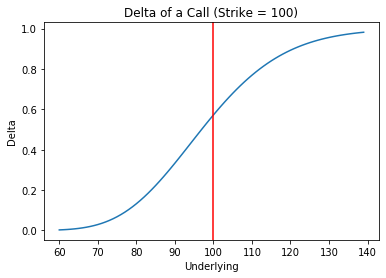

In [99]:
plt.plot(list(range(60,140)),[bs_delta(S = i, K = 100, v = 0.3, t = 120/365, r = 0.05, q = 0, cp = "c") for i in range(60, 140)])
plt.axvline(x=100, color = 'red')
plt.ylabel('Delta')
plt.xlabel('Underlying')
plt.title('Delta of a Call (Strike = 100)')

Text(0.5, 1.0, 'Vanna of a Call FIXED STRIKE (Strike = 100)')

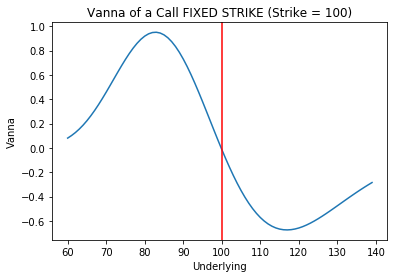

In [132]:
plt.plot(list(range(60,140)),[bs_vanna(S = i, K = 100, v = 0.3, t = 120/365, r = 0.05, q = 0, cp = "c") for i in range(60, 140)])
plt.axvline(x=100, color = 'red')
plt.ylabel('Vanna')
plt.xlabel('Underlying')
plt.title('Vanna of a Call FIXED STRIKE (Strike = 100)')

Text(0.5, 1.0, 'Vanna of a Call FIXED SPOT (Spot = 100)')

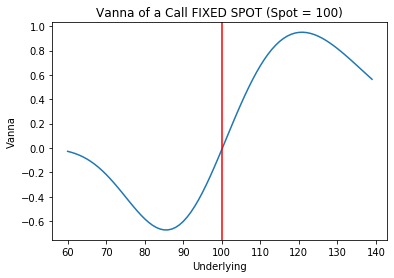

In [131]:
plt.plot(list(range(60,140)),[bs_vanna(S = 100, K = i, v = 0.3, t = 120/365, r = 0.05, q = 0, cp = "c") for i in range(60, 140)])
plt.axvline(x=100, color = 'red')
plt.ylabel('Vanna')
plt.xlabel('Underlying')
plt.title('Vanna of a Call FIXED SPOT (Spot = 100)')

Text(0.5, 1.0, 'Vega of a Digi Call (Strike = 100)')

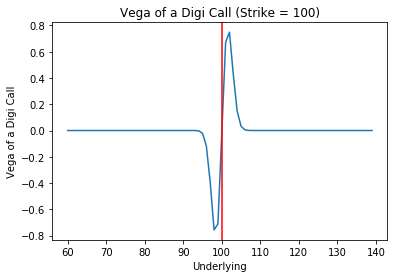

In [148]:
plt.plot(list(range(60,140)),[disc_vega(S = 100, K = i, v = 0.3, t = 1/365, r = 0.05, model = bs_digi, q = 0, cp = "c") for i in range(60, 140)])
plt.axvline(x=100, color = 'red')
plt.ylabel('Vega of a Digi Call')
plt.xlabel('Underlying')
plt.title('Vega of a Digi Call (Strike = 100)')

Text(0.5, 1.0, 'Gamma of a Call (Strike = 100)')

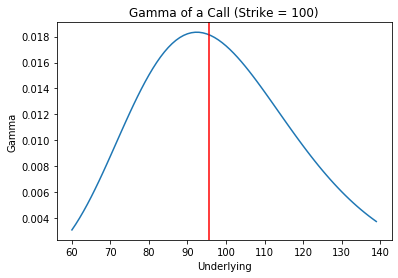

In [198]:
plt.plot(list(range(60,140)),[bs_gamma(S = i, K = 100, v = 0.4, t = 120/365, r = 0, q = 0, cp = "c") for i in range(60, 140)])
d_1 = (120/365)*(0.5*0.4**2 + 0.05) / (0.4*(120/365)**0.5)
plt.axvline(x=100*np.exp(-(0.5*0.4**2)), color = 'red')
plt.ylabel('Gamma')
plt.xlabel('Underlying')
plt.title('Gamma of a Call (Strike = 100)')
##gamma maximized at geometric mean

In [174]:
d_1

0.18634920820132364

Text(0.5, 1.0, 'Gamma of a Calls at Different Strikes')

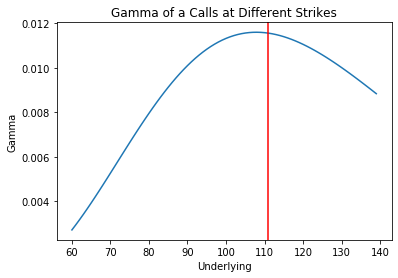

In [200]:
plt.plot(list(range(60,140)),[bs_gamma(S = 100, K = i, v = 0.6, t = 120/365, r = 0.05, q = 0, cp = "c") for i in range(60, 140)])
plt.axvline(x=100*np.exp((0.5*0.6**2)*(120/365)**0.5), color = 'red')
plt.ylabel('Gamma')
plt.xlabel('Underlying')
plt.title('Gamma of a Calls at Different Strikes')
##what am i learning here? gamma is highest at the 50 delta STRIKE, gamma is not maximized when the underlying is at the strike of the option
#gamma maximized at arithmetic mean

Text(0.5, 0, 'Gamma')

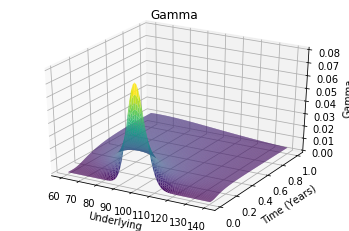

In [187]:
x = np.linspace(60, 140, 80)
y = np.linspace(0.01, 1, 365)
X, Y = np.meshgrid(x, y)
gamma_vec = np.vectorize(bs_gamma)
Z = gamma_vec(S = X, K = 100, v = 0.5, t = Y, r = 0.05, q = 0, cp = "c")
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Gamma')
ax.set_xlabel('Underlying')
ax.set_ylabel('Time (Years)')
ax.set_zlabel('Gamma')

Text(0.5, 0, 'Gamma')

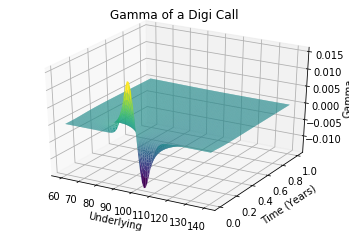

In [149]:
x = np.linspace(60, 140, 80)
y = np.linspace(0.01, 1, 365)
X, Y = np.meshgrid(x, y)
gamma_vec_digi = np.vectorize(disc_gamma)
Z = gamma_vec_digi(S = X, K = 100, v = 0.4, t = Y, r = 0.05, q = 0, model = bs_digi, cp = "c")
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Gamma of a Digi Call')
ax.set_xlabel('Underlying')
ax.set_ylabel('Time (Years)')
ax.set_zlabel('Gamma')

In [ ]:
x = np.linspace(60, 140, 20)
y = np.linspace(0.01, 1, 600)
X, Y = np.meshgrid(x, y)
gamma_vec_ko = np.vectorize(disc_gamma)
Z = gamma_vec_ko(S = X, K = 100, B = 130, v = 0.2, t = Y, r = 0.05, q = 0, model = mc_knockout, cp = "c")
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Gamma of a Reverse Knockout Call (Strike = 100, Barrier = 130)')
ax.set_xlabel('Underlying')
ax.set_ylabel('Time (Years)')
ax.set_zlabel('Vega')

Text(0.5, 0, 'Theta')

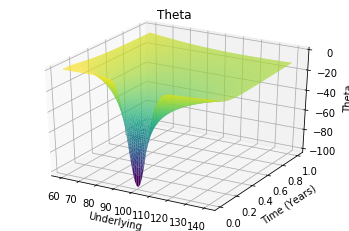

In [189]:
x = np.linspace(60, 140, 80)
y = np.linspace(0.01, 1, 365)
X, Y = np.meshgrid(x, y)
theta_vec = np.vectorize(bs_theta)
Z = theta_vec(S = X, K = 100, v = 0.5, t = Y, r = 0.05, q = 0, cp = "c")
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Theta')
ax.set_xlabel('Underlying')
ax.set_ylabel('Time (Years)')
ax.set_zlabel('Theta')

Text(0.5, 0, 'Vega')

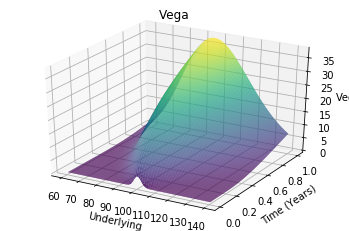

In [196]:
x = np.linspace(60, 140, 80)
y = np.linspace(0.01, 1, 365)
X, Y = np.meshgrid(x, y)
vega_vec = np.vectorize(bs_vega)
Z = vega_vec(S = X, K = 100, v = 0.2, t = Y, r = 0.05, q = 0, cp = "c")
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Vega')
ax.set_xlabel('Underlying')
ax.set_ylabel('Time (Years)')
ax.set_zlabel('Vega')

Text(0.5, 0, 'Vega')

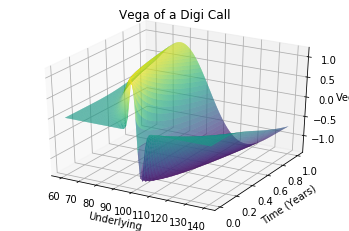

In [150]:
x = np.linspace(60, 140, 80)
y = np.linspace(0.01, 1, 365)
X, Y = np.meshgrid(x, y)
vega_vec_digi = np.vectorize(disc_vega)
Z = vega_vec_digi(S = X, K = 100, v = 0.2, t = Y, r = 0.05, q = 0, model = bs_digi, cp = "c")
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Vega of a Digi Call')
ax.set_xlabel('Underlying')
ax.set_ylabel('Time (Years)')
ax.set_zlabel('Vega')

Text(0.5, 0, 'Vega')

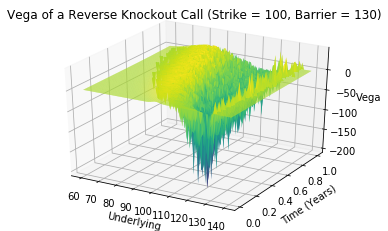

In [130]:
x = np.linspace(60, 140, 80)
y = np.linspace(0.01, 1, 300)
X, Y = np.meshgrid(x, y)
vega_vec_ko = np.vectorize(disc_vega)
Z = vega_vec_ko(S = X, K = 100, B = 130, v = 0.2, t = Y, r = 0.05, q = 0, model = mc_knockout, cp = "c")
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Vega of a Reverse Knockout Call (Strike = 100, Barrier = 130)')
ax.set_xlabel('Underlying')
ax.set_ylabel('Time (Years)')
ax.set_zlabel('Vega')

Text(0.5, 0, 'Price')

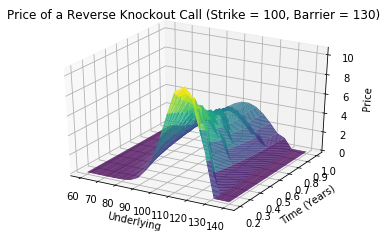

In [133]:
x = np.linspace(60, 140, 20)
y = np.linspace(0.2, 1, 100)
X, Y = np.meshgrid(x, y)
vec_ko_euro = np.vectorize(binomial_ko_euro)
Z = vec_ko_euro(S = X, K = 100, B = 130, v = 0.2, t = Y, r = 0.05, q = 0, cp = "c")
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Price of a Reverse Knockout Call (Strike = 100, Barrier = 130)')
ax.set_xlabel('Underlying')
ax.set_ylabel('Time (Years)')
ax.set_zlabel('Price')